<h1 style = "text-decoration: underline; margin:10px 0 20px 0"> Project 5 - Stats & Politics 3</h1>

In [355]:
# Import and get a feel to our data again
import pandas as pd
import numpy as np

#Import the data
df_votes = pd.read_csv("data_clean.csv")
df_data = pd.read_csv("votes_clean.csv")

# Merge the 2 data sets
df_votes_data = df_votes.merge(df_data, on='Fips', how='inner')

#Rename some columns
df_votes_data.rename(columns={'Democrats 08 (Votes)':'democrats_08_votes',
                         'Democrats 12 (Votes)':'democrats_12_votes',
                         'Republicans 08 (Votes)':'republicans_08_votes',
                         'Republicans 12 (Votes)':'republicans_12_votes',
                         'votes16_trumpd':'republicans_16_votes',
                         'votes16_clintonh': 'democrats_16_votes'
                        }, inplace=True);

# To make it easier to interperate our results later on:
df_votes_data['Uninsured'] = 100*df_votes_data['Uninsured']
df_votes_data['Unemployment'] = 100*df_votes_data['Unemployment']
df_votes_data['Children.in.single.parent.households'] = 100* df_votes_data['Children.in.single.parent.households'] 

# Create a 3 new columns with which political party will take the majority of a county’s votes.
# 1 is for Republicans, 0 is for Democrats.
df_votes_data['republicans_08_king'] = df_votes_data['Republicans 08 pct'] > 50
df_votes_data['republicans_12_king'] = df_votes_data['Republicans 12 pct'] > 50
df_votes_data['republicans_16_king'] = df_votes_data['Republicans 16 pct'] > 50


#Display info about the data
pd.set_option("display.max_columns", 100)
#display(df_votes_data.shape)
display(df_votes_data.head())
#display(df_votes_data.describe())
#df_votes_data.info()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths,democrats_08_votes,democrats_12_votes,republicans_08_votes,republicans_12_votes,republicans_16_votes,democrats_16_votes,Democrats 08 pct,Democrats 12 pct,Democrats 16 pct,Republicans 08 pct,Republicans 12 pct,Republicans 16 pct,republicans_08_king,republicans_12_king,republicans_16_king
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,42.9,0.181,0.323,0.126,747.3,79.9,19.7,10.8,449.02,82.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,40.229173,40.355992,37.340073,59.770827,59.644008,62.659927,True,True,True
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,17.9,0.304,0.328,0.135,247.2,131.3,23.9,5.3,245.83,96.8,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,35.055592,32.992770,24.400369,64.944408,67.007230,75.599631,True,True,True
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,38.1,0.210,0.298,0.118,324.1,402.4,23.9,9.6,205.60,71.6,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,33.071270,30.847684,26.182805,66.928730,69.152316,73.817195,True,True,True
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,20.4,0.095,0.132,0.036,190.9,133.7,23.0,8.1,123.88,42.9,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,61.720943,57.613836,60.812305,38.279057,42.386164,39.187695,False,False,False
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,45.3,0.189,0.358,0.153,497.9,315.8,20.8,11.5,477.48,79.4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,31.887442,31.896552,26.775558,68.112558,68.103448,73.224442,True,True,True


### Analysis Part 3:

<u>Question 3.1</u><br>
Fit a linear regression model that predicts the 2008 relative vote share of the Republican party within a county using the county-level demographic data. (You can fit your model on the entire data set.) <br>

When building your model, answer the following questions:<br> 
a) What are the data points? What are the independent and dependent variables you’ve chosen?<br>
b) How good is the fit of your model?<br>
c) What metric is a good measure to evaluate your model here?<br> 
d) Interpret your results.

<div style = "background-color: #ddffff" >
    
First of all we create 2 data frames. df_y that is our dependent variable and df_x is a data frame with our independent variable. We convert our dependent variables to be between 0 and 1. For our independent variables we select all variables that contain numerical data.
    
</div>

In [356]:
# Create dependent (y) and independent (x) variables value:
df_y = df_votes_data['Republicans 08 pct'] / 100
df_x = df_votes_data.loc[:,'Precincts':'Injury.deaths']
display(df_x.head())

,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,42.9,0.181,0.323,0.126,747.3,79.9,19.7,10.8,449.02,82.0
1,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,17.9,0.304,0.328,0.135,247.2,131.3,23.9,5.3,245.83,96.8
2,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,38.1,0.210,0.298,0.118,324.1,402.4,23.9,9.6,205.60,71.6
3,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,20.4,0.095,0.132,0.036,190.9,133.7,23.0,8.1,123.88,42.9
4,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,45.3,0.189,0.358,0.153,497.9,315.8,20.8,11.5,477.48,79.4


<div style = "background-color: #ddffff" >
    
To make our analysis easier further down the line I have created several functions. The first is a function that runs my regression models.
    
</div>

In [357]:
# Create a functions runs both a linear regresions or a logistic regression
import statsmodels.api as sm


def regression(x, y, modal = 'lm'):
    disp=False
    x_withconstant = sm.add_constant(x)
    if(modal == 'lm'):
        reg = sm.OLS(y, x_withconstant)
    if(modal == 'lgm'):
        reg = sm.Logit(y, x_withconstant)
    lm_result = reg.fit(maxiter=1000, disp = False)
    return(lm_result)


<div style = "background-color: #ddffff" >
    
To start with we look at a linear regression with all our variables. This gives us a good basis from which we can start to choose which variables to include and which not to include in our modal.
    
</div>

In [358]:
# Display Regression with all variables:
regression(df_x, df_y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:43:46   Log-Likelihood:                 3465.8
No. Observations:                3109   AIC:                            -6848.
Df Residuals:                    3067   BIC:                            -6594.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          1.7490      4.084      0.428      0.668      -6.259       9.757
Precincts                                                  -2.145e-05   2.23e-05     -0.961      0.337   -6.52e-05    2.23e-05
Votes                                                      -3.524e-07   6.06e-08     -5.817      0.000   -4.71e-07   -2.34e-07
Less Than High School Diploma                               -5.48e-05      0.001     -0.060      0.952      -0.002       0.002
At Least High School Diploma                                   0.0003      0.001      0.305      0.760      -0.001       0.002
At Least Bachelors's Degree                                   -0.0021      0.001     -3.096      0.002      -0.003      -0.001
Graduate Degree                                               -0.0075      0.001     -6.542      0.000      -0.010      -0.005
School Enrollment                                              0.0010      0.000      2.648      0.008       0.000       0.002
Median Earnings 2010                                        3.408e-08   5.73e-07      0.059      0.953   -1.09e-06    1.16e-06
White (Not Latino) Population                                  0.0027      0.010      0.269      0.788      -0.017       0.022
African American Population                                   -0.0057      0.030     -0.193      0.847      -0.064       0.052
Native American Population                                    -0.0068      0.030     -0.231      0.818      -0.065       0.051
Asian American Population                                     -0.0049      0.010     -0.492      0.623      -0.024       0.015
Other Race or Races                                           -0.0089      0.030     -0.302      0.763      -0.067       0.049
Latino Population                                             -0.0052      0.030     -0.175      0.861      -0.063       0.053
Children Under 6 Living in Poverty                            -0.0004      0.000     -1.448      0.148      -0.001       0.000
Adults 65 and Older Living in Poverty                          0.0005      0.000      1.151      0.250      -0.000       0.001
Total Population                                            1.024e-07    2.4e-08      4.274      0.000    5.54e-08    1.49e-07
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0001      0.000     -0.898      0.369      -0.000       0.000
Poverty.Rate.below.federal.poverty.threshold                  -0.0050      0.001     -5.143      0.000      -0.007      -0.003
Gini.Coefficient                                               0.1553      0.060      2.599      0.009       0.038       0.272
Child.Poverty.living.in.families.be

<div style = "background-color: #ddffff" >
    
We will be using forward selection in order to choose which are the best variables for our model.<br>

First we create a swap function that checks if we should replace the original modal by a new modal. If so it returns the boolean True. We choose to replace the first model by the second if its a more accurate predictor. That is if all the coefficients p values are larger than 0.05, that the standard errors are smaller than their coefficients and that the models adjusted r-squared is higher than that of the original model. <br>

Checking the p-value and standard error are just requirements that we choose to enforce on our modal. Checking the adjusted r-squared is what we use to compare the predictive power of our modals. We use adjusted r-squared here as we sometime have to compare modals with different number of variables. Unlike the r-squared, the adjusted r-squared adjusts it self according to the number of variables our modal has. <br>

The p-values on our coefficients are the probability that the coefficient has no effect on our model. We only assume that the coefficients are significant if our p-value is bellow 5%. The standard error measures the accuracy with which a sample distribution represents the population. If the standard error is larger than it's coefficient then we don't include it in our model as the accuracy is too poor.
</div>

In [359]:
# Functions to replace lm_1 with lm_2 if lm_2 is a better modal.
# lm = normal linear modal & lgm = modal with logistic regression.

def swap(mod_1, mod_2, modal = 'lm'):

    # checks the p-value is larger than 0.05
    if(np.sum(mod_2.pvalues > 0.05) > 0):
        return(False)
    
    #checks the standard error is smaller than the absolute value of the coefficients
    elif(np.sum(mod_2.bse > abs(mod_2.params)) > 0):
        return(False)
    
    # if it's a linear model it checks that the adjusted r-squared is higher than in mod_1
    elif(modal == 'lm'):
        if(mod_2.rsquared_adj < mod_1.rsquared_adj):
            return(False)
        else:
            return(True)
            
    # if it's a logistic regression it checks that the log-likelihood is higher than in mod_1
    elif((modal == 'lgm') & (mod_2.llf < mod_1.llf)):
        return(False)

    else:
        return(True)





<div style = "background-color: #ddffff" >
    
The following function looks for the next best variable to add to our model. If uses the swap function above to compare models. 

</div>

In [360]:
# This finds the next best variable to add to our list of independent variables. 
# ind_x is an array of our independant variables
# y is our dependant variable


def new_x(df_x, df_y, ind_x, modal = 'lm'):
    
    # Possible variables to add to our model that are not yet in reg_x
    new_variables = df_x.drop(ind_x, axis=1)
    
    # Makes a copy so that reg_x doesn't get ajusted.
    # Add the first variable in new_variables to the list of independent variables in reg_x
    x1 = ind_x.copy()
    x1.append(new_variables.columns[0])

    # For loop through each ellement in new_variables
    for i in range(new_variables.shape[1] - 1):
        
        # Add the variable at possition i in new_variables to the list of independent variables in reg_x
        x2 = ind_x.copy()
        x2.append(new_variables.columns[i+1])
        
        # Create 2 linear modals to compare.
        lm_1 = regression(df_x.loc[:,x1] , df_y, modal)
        lm_2 = regression(df_x.loc[:,x2] , df_y, modal)         
            

        # The swap function checks if lm_2 is better than lm_1. If it is, x1 is replaced by x2.
        if(swap(lm_1, lm_2, modal)):
            x1 = x2
    
    #returns a new list of independant variables
    return x1
        



<div style = "background-color: #ddffff" >
    
Finally we create a function that uses forward selection. This function starts with an empty list of independent variables (ind_x). It then adds the independent variable which creates a modal with the highest adjusted r-squared value, where for each coefficient the p-value >= 0.05 and the standard error is smaller than the coefficient. It repeats the process, adding the next best independent variable each time until there are no more new variables that can improve our model. The function terminate when there are no more new variables which will improve the adjusted r-squared where for each coefficient the p-value >= 0.05 and the standard error is smaller than the coefficient.

</div>

In [361]:
# Forward Selection

def forward_selection(df_x, df_y, modal = 'lm'):
    # ind_x is an array with our dependent variables
    # ind_x_1 is the best model of reg x + 1 additional variable
    ind_x = []
    ind_x_1 = new_x(df_x, df_y ,ind_x ,modal)

    a = regression(df_x.loc[:,ind_x] , df_y, modal)
    b = regression(df_x.loc[:,ind_x_1] , df_y, modal)
          

    # Our swap function compares the linear model with and without an aditional variable.
    # As long as adding a vairable is better than not adding a variable, ind_x is replaced by ind_x_1
    while swap(regression(df_x.loc[:,ind_x] , df_y, modal), \
               regression(df_x.loc[:,ind_x_1] , df_y, modal), \
               modal):
        ind_x = ind_x_1
        ind_x_1 = new_x(df_x, df_y ,ind_x ,modal)

        # If all variables have been included in the model we need to break out of our while loop
        if(ind_x == ind_x_1):
            break

    # return the linear model:
    df_lm = df_x.loc[:,ind_x]
    return df_lm

<div style = "background-color: #ddffff" >
    
Using the forward selection we end up with 26 variables. Our r-squared has decreased by nearly nothing (0.001 points) which implies our model has kept most of it's predictive accuracy. Additionally, our F-statistic P value is very small which means we can reject the null hypothesis that the model doesn't predict our dependent variable.<br>

</div>

In [362]:
df_lm = forward_selection(df_x, df_y)
lm = regression(df_lm , df_y)
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     250.2
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:43:56   Log-Likelihood:                 3457.4
No. Observations:                3109   AIC:                            -6861.
Df Residuals:                    3082   BIC:                            -6698.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.5560      0.048     11.493      0.000       0.461       0.651
Graduate Degree                                              -0.0077      0.001     -6.968      0.000      -0.010      -0.006
Children.in.single.parent.households                         -0.0027      0.000    -10.285      0.000      -0.003      -0.002
Uninsured                                                     0.0088      0.000     20.327      0.000       0.008       0.010
White (Not Latino) Population                                 0.0063      0.000     22.458      0.000       0.006       0.007
SIRE_homogeneity                                             -0.3203      0.019    -17.251      0.000      -0.357      -0.284
Unemployment                                                 -0.0078      0.001    -11.518      0.000      -0.009      -0.006
Teen.births                                                   0.0015      0.000     10.270      0.000       0.001       0.002
Service.occupations                                          -0.0062      0.001    -11.968      0.000      -0.007      -0.005
Diabetes                                                      1.4786      0.116     12.763      0.000       1.251       1.706
Production.transportation.and.material.moving.occupations    -0.0055      0.000    -14.022      0.000      -0.006      -0.005
median_age                                                   -0.0059      0.000    -13.149      0.000      -0.007      -0.005
Votes                                                     -3.444e-07   5.95e-08     -5.788      0.000   -4.61e-07   -2.28e-07
Native American Population                                   -0.0008      0.000     -2.408      0.016      -0.001      -0.000
Poverty.Rate.below.federal.poverty.threshold                 -0.0046      0.001     -5.954      0.000      -0.006      -0.003
Sexually.transmitted.infections                            -4.23e-05   1.08e-05     -3.931      0.000   -6.34e-05   -2.12e-05
Other Race or Races                                          -0.0039      0.001     -3.497      0.000      -0.006      -0.002
Total Population                                           8.714e-08   2.06e-08      4.222      0.000    4.67e-08    1.28e-07
Low.birthweight                                               0.5213      0.118      4.432      0.000       0.291       0.752
Adult.smoking                                                -0.1328      0.033     -4.061      0.000      -0.197      -0.069
Sales.and.office.occupations                                 -0.0019      0.001     -3.686      0.000      -0.003      -0.001
Latino Population                                          

<div style = "background-color: #ddffff" >
    
To see if we can simplify our model further we plot our r-squared values vs the number of variables we have in our model. It is clear that the first few variable increase our r-squared significantly but that very quickly, each additional independent variable added doesn't improve our r-squared by very much. Thus we have chose to just take the first 15 variables of our forward selection model.
</div>



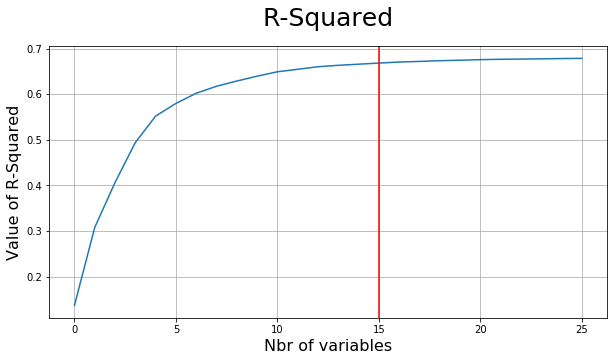

In [363]:
# Check how reg_x impoves as there are more coeficients.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)


def r_squared_graph(reg_x):
    rsq_x = []
    x_variables = []
    
    # Creates a list of R-Squared values as the number of independant variables increase
    for i in reg_x:
        x_variables.append(i)
        lr_rsq = regression(df_x.loc[:,x_variables] , df_y)
        r_squared = lr_rsq.rsquared
        rsq_x.append(r_squared)
    
    plt.plot(np.arange(len(rsq_x)), rsq_x)
    plt.axvline(x=15 , color='r', linestyle='-')
    plt.xlabel('Nbr of variables', size = 16)
    plt.ylabel('Value of R-Squared', size = 16)
    plt.title('R-Squared', size = 25, pad=20)
    plt.grid()
    plt.show()

r_squared_graph(df_lm.columns)

<div style = "background-color: #ddffff" >
    
In our new model where we just take the first 15 variables, our r-squared is still very good and the models p-value is still very small.<br>
</div>



In [364]:
# Given the graph above we can see that there isn't much difference in our R-Squared between 15 and 26 variables.
# Thus we reduce our model to contain 15 variables.

df_lm = df_lm.iloc[:,:15]
lm = regression(df_lm , df_y)
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     410.7
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:43:57   Log-Likelihood:                 3396.7
No. Observations:                3109   AIC:                            -6761.
Df Residuals:                    3093   BIC:                            -6665.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.6157      0.025     24.287      0.000       0.566       0.665
Graduate Degree                                              -0.0100      0.001    -17.641      0.000      -0.011      -0.009
Children.in.single.parent.households                         -0.0029      0.000    -11.390      0.000      -0.003      -0.002
Uninsured                                                     0.0094      0.000     22.412      0.000       0.009       0.010
White (Not Latino) Population                                 0.0054      0.000     30.166      0.000       0.005       0.006
SIRE_homogeneity                                             -0.2805      0.017    -16.199      0.000      -0.314      -0.247
Unemployment                                                 -0.0084      0.001    -12.779      0.000      -0.010      -0.007
Teen.births                                                   0.0016      0.000     12.371      0.000       0.001       0.002
Service.occupations                                          -0.0064      0.001    -12.653      0.000      -0.007      -0.005
Diabetes                                                      1.4336      0.096     14.864      0.000       1.244       1.623
Production.transportation.and.material.moving.occupations    -0.0047      0.000    -13.347      0.000      -0.005      -0.004
median_age                                                   -0.0048      0.000    -11.890      0.000      -0.006      -0.004
Votes                                                     -1.164e-07   1.48e-08     -7.851      0.000   -1.45e-07   -8.73e-08
Native American Population                                   -0.0017      0.000     -6.467      0.000      -0.002      -0.001
Poverty.Rate.below.federal.poverty.threshold                 -0.0020      0.000     -4.849      0.000      -0.003      -0.001
Sexually.transmitted.infections                           -4.616e-05   9.64e-06     -4.789      0.000   -6.51e-05   -2.73e-05
==============================================================================
Omnibus:                       15.497   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.390
Skew:                          -0.139   Prob(JB):                     0.000276
Kurtosis:                       3.222   Cond. No.                     7.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+06. This might indicate that there are
strong multicollinearity or othe

<div style = "background-color: #ddffff" >
    
Now that we are happy with our model we take 1 more step to check if there is any multicollinearity between variables.
From our correlation table bellow as well as looking at the variance inflation factor for each variable, we can see 
that White (Not Latino) Population is strongly correlated with SIRE_homogeneity.<br>

</div>

In [365]:
# Checking for multicollinearity. We assume correlations above 0.8 to have multicollinearity

def color_correlation(value):
  if value < -0.8:
    color = 'red'
  elif value > 0.8:
    color = 'red'
  else:
    color = 'black'
  return 'color: %s' % color

df_lm.corr().style.applymap(color_correlation)

,Graduate Degree,Children.in.single.parent.households,Uninsured,White (Not Latino) Population,SIRE_homogeneity,Unemployment,Teen.births,Service.occupations,Diabetes,Production.transportation.and.material.moving.occupations,median_age,Votes,Native American Population,Poverty.Rate.below.federal.poverty.threshold,Sexually.transmitted.infections
Graduate Degree,1,-0.121173,-0.304286,-0.0366388,-0.153255,-0.124225,-0.45386,-0.0723431,-0.443484,-0.51368,-0.235108,0.389022,-0.0706506,-0.274584,0.0418896
Children.in.single.parent.households,-0.121173,1,0.271749,-0.596723,-0.505536,0.494535,0.538871,0.366822,0.491174,0.156295,-0.201516,0.0359315,0.169797,0.6241,0.673253
Uninsured,-0.304286,0.271749,1,-0.473292,-0.440478,0.172945,0.622544,0.199271,0.2863,-0.0142075,-0.107682,-0.0836695,0.124386,0.505132,0.190114
White (Not Latino) Population,-0.0366388,-0.596723,-0.473292,1,0.851323,-0.30898,-0.528782,-0.286119,-0.197044,0.138097,0.456658,-0.22124,-0.239618,-0.480527,-0.677673
SIRE_homogeneity,-0.153255,-0.505536,-0.440478,0.851323,1,-0.227305,-0.425743,-0.181692,-0.130539,0.188836,0.449061,-0.290143,-0.152348,-0.293014,-0.585235
Unemployment,-0.124225,0.494535,0.172945,-0.30898,-0.227305,1,0.298173,0.252982,0.381494,0.24406,-0.0947841,0.0417724,0.0397222,0.459166,0.3008
Teen.births,-0.45386,0.538871,0.622544,-0.528782,-0.425743,0.298173,1,0.213939,0.495098,0.263964,-0.204667,-0.14488,0.219827,0.637833,0.436319
Service.occupations,-0.0723431,0.366822,0.199271,-0.286119,-0.181692,0.252982,0.213939,1,0.0946694,-0.220266,-0.0398494,-0.0540334,0.176621,0.365924,0.222829
Diabetes,-0.443484,0.491174,0.2863,-0.197044,-0.130539,0.381494,0.495098,0.0946694,1,0.404094,0.153441,-0.203016,0.103618,0.510965,0.334263
Production.transportation.and.material.moving.occupations,-0.51368,0.156295,-0.0142075,0.138097,0.188836,0.24406,0.263964,-0.220266,0.404094,1,0.0164241,-0.232344,-0.125375,0.202308,-0.00237838


In [366]:
# Using the variance inflation factor to check if we have multicollinearity (cut off point is 5)

X = sm.add_constant(df_lm)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                                                        301.822437
Graduate Degree                                                2.263975
Children.in.single.parent.households                           3.158228
Uninsured                                                      2.409022
White (Not Latino) Population                                  5.547072
SIRE_homogeneity                                               4.783775
Unemployment                                                   1.540013
Teen.births                                                    3.030474
Service.occupations                                            1.480930
Diabetes                                                       2.186089
Production.transportation.and.material.moving.occupations      2.118658
median_age                                                     1.793364
Votes                                                          1.328126
Native American Population                                     1

<div style = "background-color: #ddffff" >
 
As removing "White (Not Latino) Population" has a much bigger impact on the accuracy of the model (r-squared) than removing "SIRE_homogeneity", we decided to remove "SIRE_homogeneity" from our model.<br>

Our final model still has a relatively high r-squared. Only having decreased by 0.03 points. We also have no more multicollinearity inside our modal.



</div>

In [367]:
# createing 2 new linear models to compare which variable it is best to drop
lm_1 = regression(df_lm.drop(["White (Not Latino) Population"], axis=1), df_y)
lm_2 = regression(df_lm.drop("SIRE_homogeneity", axis=1), df_y)

# checking which is the better model
if (swap(lm_1, lm_2)):
    display(lm_2.summary())
else:
    display(lm_1.summary())
    
# Given the adjusted R-squared went down by only 0.03. We decided to remove "SIRE_homogeneity" from our modle
# lm_1 is our final model!
df_lm = df_lm.drop("SIRE_homogeneity", axis=1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     388.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:43:57   Log-Likelihood:                 3270.1
No. Observations:                3109   AIC:                            -6510.
Df Residuals:                    3094   BIC:                            -6420.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.5627      0.026     21.495      0.000       0.511       0.614
Graduate Degree                                              -0.0086      0.001    -14.620      0.000      -0.010      -0.007
Children.in.single.parent.households                         -0.0022      0.000     -8.468      0.000      -0.003      -0.002
Uninsured                                                     0.0112      0.000     26.727      0.000       0.010       0.012
White (Not Latino) Population                                 0.0035      0.000     24.743      0.000       0.003       0.004
Unemployment                                                 -0.0083      0.001    -12.112      0.000      -0.010      -0.007
Teen.births                                                   0.0017      0.000     12.824      0.000       0.001       0.002
Service.occupations                                          -0.0068      0.001    -12.907      0.000      -0.008      -0.006
Diabetes                                                      1.6069      0.100     16.097      0.000       1.411       1.803
Production.transportation.and.material.moving.occupations    -0.0051      0.000    -13.738      0.000      -0.006      -0.004
median_age                                                   -0.0060      0.000    -14.525      0.000      -0.007      -0.005
Votes                                                     -9.228e-08   1.54e-08     -6.008      0.000   -1.22e-07   -6.22e-08
Native American Population                                   -0.0019      0.000     -6.998      0.000      -0.002      -0.001
Poverty.Rate.below.federal.poverty.threshold                 -0.0042      0.000    -10.561      0.000      -0.005      -0.003
Sexually.transmitted.infections                           -3.948e-05      1e-05     -3.937      0.000   -5.91e-05   -1.98e-05
==============================================================================
Omnibus:                       43.672   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.172
Skew:                          -0.259   Prob(JB):                     5.71e-11
Kurtosis:                       3.310   Cond. No.                     7.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [368]:
# Using the variance inflation factor to check if we have multicollinearity (cut off point is 5)

X_lm = sm.add_constant(df_lm)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_lm.values, i) 
               for i in range(X_lm.shape[1])], 
              index=X_lm.columns)

const                                                        296.800595
Graduate Degree                                                2.204929
Children.in.single.parent.households                           3.070874
Uninsured                                                      2.232672
White (Not Latino) Population                                  3.275359
Unemployment                                                   1.539851
Teen.births                                                    3.019823
Service.occupations                                            1.477554
Diabetes                                                       2.159205
Production.transportation.and.material.moving.occupations      2.111584
median_age                                                     1.732739
Votes                                                          1.314744
Native American Population                                     1.166508
Poverty.Rate.below.federal.poverty.threshold                   2

<div style = "background-color: #ddffff" >
 
Finally we compare our model to the best of 10,000 randomly made modal with 14 independent variables. As our model is a better predictor than any of the other 10,000 randomly made models, it strengthens our conclusion that we have a relatively strong model.

</div>

In [369]:
# Random sellect from 10000 randomly made models with 14 independent variables:
# Still never seen it larger than 0.637


import random
random.seed( 30 )


lm_random = []
rsq_random = 0

for i in range(10000):
    new_list = random.sample(list(df_x.columns), 14)
    new_lm = regression(df_x.loc[:,new_list], df_y)

    if(np.sum(new_lm.pvalues > 0.05) > 0):
        
        if(np.sum(new_lm.bse > abs(new_lm.params)) > 0):
            
            if (new_lm.rsquared_adj > rsq_random):
                lm_random = new_list
                rsq_random = new_lm.rsquared_adj
    
regression(df_x.loc[:,lm_random], df_y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     370.4
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:45:13   Log-Likelihood:                 3223.3
No. Observations:                3109   AIC:                            -6417.
Df Residuals:                    3094   BIC:                            -6326.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.4517      0.027     16.752      0.000       0.399       0.505
median_age                              -0.0029      0.000     -7.320      0.000      -0.004      -0.002
White_Asian                             -0.0044      0.001     -4.589      0.000      -0.006      -0.002
Sexually.transmitted.infections      -5.751e-05   1.11e-05     -5.204      0.000   -7.92e-05   -3.58e-05
White (Not Latino) Population            0.0099      0.001     10.520      0.000       0.008       0.012
SIRE_homogeneity                        -0.3523      0.018    -19.510      0.000      -0.388      -0.317
At Least Bachelors's Degree             -0.0026      0.000     -9.287      0.000      -0.003      -0.002
Precincts                            -3.232e-05   1.02e-05     -3.166      0.002   -5.23e-05   -1.23e-05
African American Population           6.352e-05      0.000      0.268      0.789      -0.000       0.001
Uninsured                                0.0091      0.000     21.636      0.000       0.008       0.010
Teen.births                              0.0013      0.000      8.699      0.000       0.001       0.002
Diabetes                                 1.0153      0.111      9.178      0.000       0.798       1.232
Unemployment                            -0.0120      0.001    -17.776      0.000      -0.013      -0.011
Low.birthweight                          0.5447      0.122      4.469      0.000       0.306       0.784
Children.in.single.parent.households    -0.0047      0.000    -18.631      0.000      -0.005      -0.004
==============================================================================
Omnibus:                        9.521   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.429
Skew:                          -0.085   Prob(JB):                      0.00544
Kurtosis:                       3.227   Cond. No.                     3.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style = "background-color: #ddffff" >


We now have a modal that can predict the share of people voting republican in each county with relatively good accuracy. Our model is the sum of all our variable multiplied by their coefficient. <br>

Our model predicts that a 1% increase in the White (Not Latino) population will increase the share of people voting republican by 0.35%. Or that a 1% increase in graduate students would reduce the share of people voting republican by 0.85%. Some more extreme examples would be that a 1% increase in the uninsured population increases the the number of republican votes by 1.12%, or that a 1% increase of the population with Diabetes increases the share of republican votes by 1.6%! <br>

From our modal we conclude that counties with more diversity (skin color), more educated and more populated will have a lower share or republican voters. We also conclude that counties with lower unemployment, higher diabetes (probably linked to obesity), and with less need for social welfare (e.g. single parents) are more likely to vote republican.

Note: If everyone had diabetes in a county, our model would predict an increase of 160% in the share of Republicans. This is a problem as obviously the number of republicans can't go over 100% of the population. This is one of the draw backs of using a linear modal.



### Variables that decrease republican Share:
Graduate Degree,
Children.in.single.parent.households,
Unemployment,
Service.occupations,
Production.transportation.and.material.moving.occupations,
median_age,
Votes,
Native American Population,
Poverty.Rate.below.federal.poverty.threshold,
Sexually.transmitted.infections

### Variables that increase republican share:
Uninsured,
White (Not Latino) Population,
Teen.births,
Diabetes

</div>

<u>Question 3.2</u><br>
Fit a logistic regression model using the same demographic data to predict which political party will take the majority of a county’s votes. (Please use the statsmodels package to create your logistic regression model here, not scikit-learn.)<br>

a) How good is the fit of your model? <br>
b) What metric is a good measure to evaluate your model here? <br>
c) Interpret your results.

<div style = "background-color: #ddffff" >
 
We start by taking the same dependent and independent variables

</div>

In [370]:
# Create dependant (y) and independant (x) variables value:

df_y = df_votes_data['Republicans 08 pct'] / 100
df_x = df_votes_data.loc[:,'Precincts':'Injury.deaths']
display(df_x.head())

,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,68.45,0.539968,36.8,0.10,47.7,42.9,0.181,0.323,0.126,747.3,79.9,19.7,10.8,449.02,82.0
1,20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.30,0.849006,38.5,0.07,49.0,17.9,0.304,0.328,0.135,247.2,131.3,23.9,5.3,245.83,96.8
2,3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.80,0.579201,38.1,0.09,54.1,38.1,0.210,0.298,0.118,324.1,402.4,23.9,9.6,205.60,71.6
3,30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,69.55,0.551646,33.4,0.09,41.3,20.4,0.095,0.132,0.036,190.9,133.7,23.0,8.1,123.88,42.9
4,16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.60,0.527235,37.7,0.12,64.0,45.3,0.189,0.358,0.153,497.9,315.8,20.8,11.5,477.48,79.4


<div style = "background-color: #ddffff" >
 
Then we create a model that includes all our variables. <br>

NOTE: With a Logistic Regression model we compare the accuracy of our models with the Log Likelihood.

</div>

In [371]:
regression(df_x , df_y, 'lgm').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Republicans 08 pct   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3067
Method:                           MLE   Df Model:                           41
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                 -0.1004
Time:                        13:45:13   Log-Likelihood:                -1924.1
converged:                       True   LL-Null:                       -1748.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          4.1970    106.246      0.040      0.968    -204.041     212.435
Precincts                                                  -9.071e-05      0.001     -0.153      0.879      -0.001       0.001
Votes                                                      -1.477e-06   1.61e-06     -0.918      0.358   -4.63e-06    1.68e-06
Less Than High School Diploma                                  0.0003      0.027      0.010      0.992      -0.052       0.053
At Least High School Diploma                                   0.0013      0.026      0.053      0.958      -0.049       0.051
At Least Bachelors's Degree                                   -0.0098      0.018     -0.553      0.580      -0.045       0.025
Graduate Degree                                               -0.0316      0.030     -1.050      0.294      -0.091       0.027
School Enrollment                                              0.0046      0.010      0.471      0.637      -0.015       0.024
Median Earnings 2010                                        4.895e-08   1.51e-05      0.003      0.997   -2.95e-05    2.96e-05
White (Not Latino) Population                                  0.0160   3.76e+04   4.24e-07      1.000   -7.37e+04    7.37e+04
African American Population                                   -0.0140      0.769     -0.018      0.986      -1.522       1.494
Native American Population                                    -0.0199      0.769     -0.026      0.979      -1.528       1.488
Asian American Population                                     -0.0188   3.76e+04  -4.99e-07      1.000   -7.37e+04    7.37e+04
Other Race or Races                                           -0.0287      0.771     -0.037      0.970      -1.539       1.482
Latino Population                                             -0.0118      0.770     -0.015      0.988      -1.520       1.496
Children Under 6 Living in Poverty                            -0.0017      0.007     -0.228      0.819      -0.016       0.013
Adults 65 and Older Living in Poverty                          0.0019      0.012      0.153      0.878      -0.023       0.026
Total Population                                            4.299e-07   6.37e-07      0.675      0.500   -8.19e-07    1.68e-06
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0004      0.003     -0.142      0.887      -0.006       0.005
Poverty.Rate.below.federal.poverty.threshold                  -0.0225      0.026     -0.874      0.382      -0.073       0.028
Gini.Coefficient                                               0.7189      1.587      0.453      0.650      -2.391       3.829
Child.Poverty.living.in.families.below.the.poverty.line        0.0071      0.015      0.465      0.642      -0.023       0.037
Management.professional.and.related.occupations               -0.0

<div style = "background-color: #ddffff" >
 
We use forward selection again this time to calculate our modal. The only difference is that instead of comparing the adjusted r-squared values we compare the log likelihood when comparing models. The larger our log likelihood the better predictor our model is.<br>

We are now left with just 7 variables and a log likelihood of -1951.4 vs a log likelihood of -1924.1 when we included all the independant variables. Such a big decrease in the number of independent variables may have affected how good our model is at predicting our dependent variable. To look further into this we plotted bellow how the Log likelihood increases as the number of variables in our model increases.
</div>

In [372]:
df_lgm = forward_selection(df_x, df_y, 'lgm')
lg_reg = regression(df_lgm , df_y, 'lgm')
lg_reg.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Republicans 08 pct   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3101
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                 -0.1160
Time:                        13:45:16   Log-Likelihood:                -1951.4
converged:                       True   LL-Null:                       -1748.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8015      0.602     -2.994      0.003      -2.981      -0.622
Graduate Degree                         -0.0319      0.012     -2.609      0.009      -0.056      -0.008
Children.in.single.parent.households    -0.0116      0.006     -2.080      0.038      -0.023      -0.001
Uninsured                                0.0556      0.010      5.411      0.000       0.035       0.076
White (Not Latino) Population            0.0158      0.003      5.366      0.000       0.010       0.022
Median Earnings 2010                   1.89e-05   9.38e-06      2.015      0.044    5.18e-07    3.73e-05
Teen.births                              0.0073      0.003      2.335      0.020       0.001       0.013
Unemployment                            -0.0460      0.016     -2.925      0.003      -0.077      -0.015
========================================================================================================
"""

In [373]:
# Clearler we loose a huge amount of presision. But in order to add extra variales we would have to significatly
# our p value and as well as allow our std error to be larger than our coefficient.
# Add an the log liklihood graph seb!

<div style = "background-color: #ddffff" >
 
The following code is to create a list of independent variables. We start off by having all the same variables as in our modal. We then add the variable that improves our models log likelihood by the largest amount. We keep on doing this until we have added all the independent variables to our list. Now that we have created an ordered list we can plot how the log likelihood increase as the number of variables increase. <br>

 This is very similar to the function above that selects the next best variable to add in the forward selection process. I decided not to use a generic function for this as the differences in the code made it more complicated that it needs to be.
</div>

In [374]:


ind_x = list(df_lgm.columns)

for i in range(df_x.drop(ind_x, axis=1).shape[1]):
    new_variables = df_x.drop(ind_x, axis=1)
    x1 = ind_x.copy()
    x1.append(new_variables.columns[0])

    # For loop through each ellement in new_variables
    for i in range(new_variables.shape[1] - 1):


        # Add the variable at possition i in new_variables to the list of independent variables in reg_x
        x2 = ind_x.copy()
        x2.append(new_variables.columns[i+1])

        # Create 2 linear modals to compare.
        lm_1 = regression(df_x.loc[:,x1] , df_y, 'lgm')
        lm_2 = regression(df_x.loc[:,x2] , df_y, 'lgm')         


        # The swap function checks if lm_2 has a higher log likelihood value then in lm_1. If it is, x1 is replaced by x2.
        if(lm_1.llf < lm_2.llf):
            x1 = x2

    ind_x = x1

print(x1)    


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Graduate Degree', 'Children.in.single.parent.households', 'Uninsured', 'White (Not Latino) Population', 'Median Earnings 2010', 'Teen.births', 'Unemployment', 'SIRE_homogeneity', 'Diabetes', 'Service.occupations', 'Production.transportation.and.material.moving.occupations', 'median_age', 'Votes', 'Native American Population', 'Sexually.transmitted.infections', 'Poverty.Rate.below.federal.poverty.threshold', 'Other Race or Races', 'Total Population', 'Sales.and.office.occupations', 'Low.birthweight', 'Adult.smoking', 'Latino Population', 'School Enrollment', "At Least Bachelors's Degree", 'Gini.Coefficient', 'Child.Poverty.living.in.families.below.the.poverty.line', 'HIV.prevalence.rate', 'Construction.extraction.maintenance.and.repair.occupations', 'White_Asian', 'Adult.obesity', 'Children Under 6 Living in Poverty', 'Injury.deaths', 'Adults 65 and Older Living in Poverty', 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4', 'Precincts', 'Violent.crime', 'At Least High School Diploma

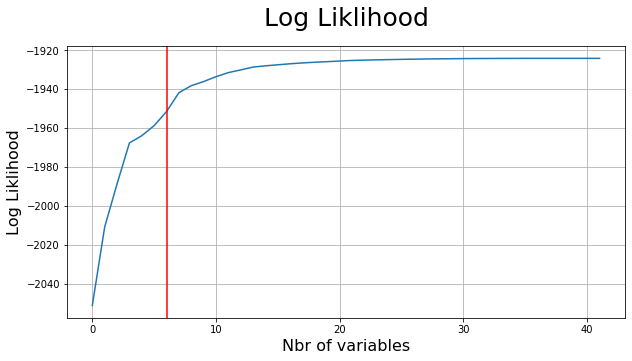

In [375]:
def log_likelihood(reg_x):
    rsq_x = []
    x_variables = []
    
    # Creates a list of Log Likelihood values as the number of independant variables increase
    for i in reg_x:
        x_variables.append(i)
        lr_rsq = regression(df_x.loc[:,x_variables] , df_y, 'lgm')
        llhood = lr_rsq.llf
        rsq_x.append(llhood)
    
    plt.plot(np.arange(len(rsq_x)), rsq_x)
    plt.axvline(x=6 , color='r', linestyle='-')
    #plt.axhline(y=-1951.4, color='r', linestyle='-')
    plt.xlabel('Nbr of variables', size = 16)
    plt.ylabel('Log Liklihood', size = 16)
    plt.title('Log Liklihood', size = 25, pad=20)
    plt.grid()
    plt.show()

log_likelihood(ind_x)

<div style = "background-color: #ddffff" >
 
In the following graph we see the the log likelihood increase quite strongly for the first few variables and then additional variables don't improve the model as much. To add more variables to our model we would have to change the confidence interval and increase our standard error. When running our forward selection with a confidence interval of 10% and allowing for standard error to be twice as large as any coefficient we only get a total of 8 variables and our Log Likelihood only increase to -1946.8. As there is little gain in accuracy when easing the constraints, we will stick to our original model of 7 variables.<br>

Additionally we check again for multicollinearity using the variance inflation factor. As there are no variables with a variance inflation factor above 5 we keep our modal as it is. 
    
    

</div>

In [376]:
X = sm.add_constant(df_lgm)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                                   257.462585
Graduate Degree                           1.601380
Children.in.single.parent.households      2.334955
Uninsured                                 2.118055
White (Not Latino) Population             2.297326
Median Earnings 2010                      1.610672
Teen.births                               2.666576
Unemployment                              1.332821
dtype: float64

<div style = "background-color: #ddffff" >
 
Finally we calculate the accuracy of the modal we just made. We have 81.9% accuracy in predicting the winning party in 2008, 85.91% accuracy on predicting the winning party in 2012 and 87.77% accuracy in predicting the winning party in 2016. This is surprising given the model was made given the data of 2008. We would have expected it to be most accurate on the data of 2008.

</div>

In [377]:
# Calculating the acuracy of my modal:

X_lgm = sm.add_constant(df_lgm)

y_08_outcome = df_votes_data['republicans_08_king']
y_12_outcome = df_votes_data['republicans_12_king']
y_16_outcome = df_votes_data['republicans_16_king']

# creating a list of predictions give our new modal
y_pred = lg_reg.predict(X_lgm)

print(np.mean(np.where(y_pred>0.5,1,0)==y_08_outcome))
print(np.mean(np.where(y_pred>0.5,1,0)==y_12_outcome))
print(np.mean(np.where(y_pred>0.5,1,0)==y_16_outcome))

0.8192344805403666
0.8591186876809264
0.8777742039240913


In [378]:
# Calculating our betas

betas = lg_reg.params
np.exp(betas)

const                                   0.165058
Graduate Degree                         0.968607
Children.in.single.parent.households    0.988436
Uninsured                               1.057167
White (Not Latino) Population           1.015964
Median Earnings 2010                    1.000019
Teen.births                             1.007333
Unemployment                            0.955089
dtype: float64

<div style = "background-color: #ddffff" >
 
We get similar results to what we found with a linear regression. An increase in uninsured white people increases the proportion of republican voters, whiles an increase in Graduate Degrees, single parents and unemployment reduces the the proportion of republican voters.

More specifically, we are now looking at the chances of republicans having a majority share instead of just an increase in the proportion. For example the chances of republicans having a majority share in a county is 1.057 times more likely when the number of uninsured people increase by 1%.

Note that this time the probability of republicans having a majority vote always stays between 0 and 1 as it should.

</div>

<u>Question 3.3</u><br>
Now build new models to predict the 2012 and 2016 relative vote share of the Republican party, respectively. How does each of their performances compare to your 2008 model from question 4.1?

<div style = "background-color: #ddffff" >
 
Using the same variables from our original modal we notice again that our r-squared increases from 0.637 in 2008, to 0.686 in 2012, to 0.787 in 2016. Thus the accuracy of our model increasing significantly. This may be due to the data having been collected in 2016 and thus having a larger impact on 2016. It might also be due to an increase in sensitivity to the different variables. Our r-squared might get better and better in each election but not all variables are improving in predictability. In our model the p value for 'Native American Population' in 2016 is 0.351. Thus we would probably remove this variable from our model if we had made it using the data of 2016.

</div>

In [379]:
df_08 = df_votes_data['Republicans 08 pct'] / 100
df_12 = df_votes_data['Republicans 12 pct'] / 100
df_16 = df_votes_data['Republicans 16 pct'] / 100


display(regression(df_lm, df_08).summary())
display(regression(df_lm, df_12).summary())
display(regression(df_lm, df_16).summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 08 pct   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     388.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:45:28   Log-Likelihood:                 3270.1
No. Observations:                3109   AIC:                            -6510.
Df Residuals:                    3094   BIC:                            -6420.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.5627      0.026     21.495      0.000       0.511       0.614
Graduate Degree                                              -0.0086      0.001    -14.620      0.000      -0.010      -0.007
Children.in.single.parent.households                         -0.0022      0.000     -8.468      0.000      -0.003      -0.002
Uninsured                                                     0.0112      0.000     26.727      0.000       0.010       0.012
White (Not Latino) Population                                 0.0035      0.000     24.743      0.000       0.003       0.004
Unemployment                                                 -0.0083      0.001    -12.112      0.000      -0.010      -0.007
Teen.births                                                   0.0017      0.000     12.824      0.000       0.001       0.002
Service.occupations                                          -0.0068      0.001    -12.907      0.000      -0.008      -0.006
Diabetes                                                      1.6069      0.100     16.097      0.000       1.411       1.803
Production.transportation.and.material.moving.occupations    -0.0051      0.000    -13.738      0.000      -0.006      -0.004
median_age                                                   -0.0060      0.000    -14.525      0.000      -0.007      -0.005
Votes                                                     -9.228e-08   1.54e-08     -6.008      0.000   -1.22e-07   -6.22e-08
Native American Population                                   -0.0019      0.000     -6.998      0.000      -0.002      -0.001
Poverty.Rate.below.federal.poverty.threshold                 -0.0042      0.000    -10.561      0.000      -0.005      -0.003
Sexually.transmitted.infections                           -3.948e-05      1e-05     -3.937      0.000   -5.91e-05   -1.98e-05
==============================================================================
Omnibus:                       43.672   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.172
Skew:                          -0.259   Prob(JB):                     5.71e-11
Kurtosis:                       3.310   Cond. No.                     7.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 12 pct   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     483.8
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:45:28   Log-Likelihood:                 3288.0
No. Observations:                3109   AIC:                            -6546.
Df Residuals:                    3094   BIC:                            -6455.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.5217      0.026     20.042      0.000       0.471       0.573
Graduate Degree                                              -0.0092      0.001    -15.745      0.000      -0.010      -0.008
Children.in.single.parent.households                         -0.0027      0.000    -10.608      0.000      -0.003      -0.002
Uninsured                                                     0.0119      0.000     28.505      0.000       0.011       0.013
White (Not Latino) Population                                 0.0044      0.000     31.287      0.000       0.004       0.005
Unemployment                                                 -0.0084      0.001    -12.270      0.000      -0.010      -0.007
Teen.births                                                   0.0018      0.000     13.473      0.000       0.002       0.002
Service.occupations                                          -0.0063      0.001    -12.048      0.000      -0.007      -0.005
Diabetes                                                      1.4871      0.099     14.984      0.000       1.293       1.682
Production.transportation.and.material.moving.occupations    -0.0050      0.000    -13.627      0.000      -0.006      -0.004
median_age                                                   -0.0060      0.000    -14.535      0.000      -0.007      -0.005
Votes                                                      -8.41e-08   1.53e-08     -5.508      0.000   -1.14e-07   -5.42e-08
Native American Population                                   -0.0015      0.000     -5.446      0.000      -0.002      -0.001
Poverty.Rate.below.federal.poverty.threshold                 -0.0037      0.000     -9.427      0.000      -0.005      -0.003
Sexually.transmitted.infections                           -4.232e-05   9.97e-06     -4.244      0.000   -6.19e-05   -2.28e-05
==============================================================================
Omnibus:                       51.226   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.992
Skew:                          -0.274   Prob(JB):                     4.21e-13
Kurtosis:                       3.375   Cond. No.                     7.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Republicans 16 pct   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     818.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:45:28   Log-Likelihood:                 3675.9
No. Observations:                3109   AIC:                            -7322.
Df Residuals:                    3094   BIC:                            -7231.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.4521      0.023     19.678      0.000       0.407       0.497
Graduate Degree                                              -0.0145      0.001    -28.289      0.000      -0.016      -0.014
Children.in.single.parent.households                         -0.0023      0.000    -10.317      0.000      -0.003      -0.002
Uninsured                                                     0.0091      0.000     24.717      0.000       0.008       0.010
White (Not Latino) Population                                 0.0052      0.000     41.887      0.000       0.005       0.005
Unemployment                                                 -0.0088      0.001    -14.670      0.000      -0.010      -0.008
Teen.births                                                   0.0018      0.000     15.096      0.000       0.002       0.002
Service.occupations                                          -0.0042      0.000     -8.999      0.000      -0.005      -0.003
Diabetes                                                      1.2572      0.088     14.350      0.000       1.085       1.429
Production.transportation.and.material.moving.occupations    -0.0029      0.000     -8.840      0.000      -0.003      -0.002
median_age                                                   -0.0040      0.000    -10.999      0.000      -0.005      -0.003
Votes                                                      -9.79e-08   1.35e-08     -7.263      0.000   -1.24e-07   -7.15e-08
Native American Population                                   -0.0002      0.000     -0.934      0.351      -0.001       0.000
Poverty.Rate.below.federal.poverty.threshold                 -0.0024      0.000     -6.749      0.000      -0.003      -0.002
Sexually.transmitted.infections                           -6.309e-05    8.8e-06     -7.168      0.000   -8.03e-05   -4.58e-05
==============================================================================
Omnibus:                      155.343   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.487
Skew:                          -0.443   Prob(JB):                     5.41e-51
Kurtosis:                       4.001   Cond. No.                     7.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style = "background-color: #ddffff" >
 
Once again the accuracy increases for each election. Our Log-Likelihood is at -1214.7 for 2008, -952.07 for 2012, and -561.71 in 2016.
</div>

In [380]:
#display(df_votes_data.head())

lg_reg_08 = regression(df_lgm, df_votes_data['republicans_08_king'], modal = 'lgm')
lg_reg_12 = regression(df_lgm, df_votes_data['republicans_12_king'], modal = 'lgm')
lg_reg_16 = regression(df_lgm, df_votes_data['republicans_16_king'], modal = 'lgm')

display(lg_reg_08.summary())
display(lg_reg_12.summary())
display(lg_reg_16.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     republicans_08_king   No. Observations:                 3109
Model:                           Logit   Df Residuals:                     3101
Method:                            MLE   Df Model:                            7
Date:                 Sat, 26 Oct 2019   Pseudo R-squ.:                  0.3422
Time:                         13:45:28   Log-Likelihood:                -1214.7
converged:                        True   LL-Null:                       -1846.8
Covariance Type:             nonrobust   LLR p-value:                9.796e-269
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -10.3130      0.909    -11.344      0.000     -12.095      -8.531
Graduate Degree                         -0.1415      0.018     -8.050      0.000      -0.176      -0.107
Children.in.single.parent.households    -0.0410      0.008     -4.980      0.000      -0.057      -0.025
Uninsured                                0.2507      0.017     14.669      0.000       0.217       0.284
White (Not Latino) Population            0.0777      0.005     16.698      0.000       0.069       0.087
Median Earnings 2010                     0.0001   1.31e-05      7.749      0.000    7.57e-05       0.000
Teen.births                              0.0400      0.005      8.271      0.000       0.031       0.049
Unemployment                            -0.1346      0.023     -5.950      0.000      -0.179      -0.090
========================================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     republicans_12_king   No. Observations:                 3109
Model:                           Logit   Df Residuals:                     3101
Method:                            MLE   Df Model:                            7
Date:                 Sat, 26 Oct 2019   Pseudo R-squ.:                  0.4224
Time:                         13:45:28   Log-Likelihood:                -952.07
converged:                        True   LL-Null:                       -1648.2
Covariance Type:             nonrobust   LLR p-value:                1.741e-296
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -9.7191      1.033     -9.406      0.000     -11.744      -7.694
Graduate Degree                         -0.1633      0.019     -8.437      0.000      -0.201      -0.125
Children.in.single.parent.households    -0.0642      0.009     -6.838      0.000      -0.083      -0.046
Uninsured                                0.2514      0.020     12.839      0.000       0.213       0.290
White (Not Latino) Population            0.0948      0.005     17.417      0.000       0.084       0.105
Median Earnings 2010                  7.159e-05   1.36e-05      5.250      0.000    4.49e-05    9.83e-05
Teen.births                              0.0401      0.006      7.184      0.000       0.029       0.051
Unemployment                            -0.0941      0.026     -3.634      0.000      -0.145      -0.043
========================================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     republicans_16_king   No. Observations:                 3109
Model:                           Logit   Df Residuals:                     3101
Method:                            MLE   Df Model:                            7
Date:                 Sat, 26 Oct 2019   Pseudo R-squ.:                  0.5832
Time:                         13:45:28   Log-Likelihood:                -561.71
converged:                        True   LL-Null:                       -1347.8
Covariance Type:             nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -6.3788      1.318     -4.841      0.000      -8.961      -3.796
Graduate Degree                         -0.3894      0.028    -13.775      0.000      -0.445      -0.334
Children.in.single.parent.households    -0.0538      0.011     -4.780      0.000      -0.076      -0.032
Uninsured                                0.1637      0.023      7.039      0.000       0.118       0.209
White (Not Latino) Population            0.1176      0.007     16.703      0.000       0.104       0.131
Median Earnings 2010                  4.755e-05    1.7e-05      2.795      0.005    1.42e-05    8.09e-05
Teen.births                              0.0336      0.007      4.799      0.000       0.020       0.047
Unemployment                            -0.1167      0.034     -3.468      0.001      -0.183      -0.051
========================================================================================================
"""

<div style = "background-color: #ddffff" >
 
To look at exactly how good our models are in each year we calculate their accuracy. In 2008 the accuracy was 82.1%, whiles in 2012 and 2016 the accuracy was 87.1% and 92.3%. Given we only have 7 variables we can conclude that our modals are very good. Especially for the year of 2016. The reasons for the model being better will be the same reasoning mentioned above with the linear regression modals.

</div>

In [381]:
# Predicts the probbility that the model is accurate.

X_lgm = sm.add_constant(df_lgm)

y_08_outcome = df_votes_data['republicans_08_king']
y_12_outcome = df_votes_data['republicans_12_king']
y_16_outcome = df_votes_data['republicans_16_king']

y_pred_08 = lg_reg_08.predict(X_lgm)
y_pred_12 = lg_reg_12.predict(X_lgm)
y_pred_16 = lg_reg_16.predict(X_lgm)

display(np.mean(np.where(y_pred_08>0.5,1,0)==y_08_outcome))
display(np.mean(np.where(y_pred_12>0.5,1,0)==y_12_outcome))
display(np.mean(np.where(y_pred_16>0.5,1,0)==y_16_outcome))

0.8211643615310389

0.8713412672885172

0.9234480540366677

<div style = "background-color: #ddffff" >
 
To conclude we have created 6 modals, 3 linear and 3 logistic. In the linear modal we ended with 14 variables whiles in the logistic regression we only had 7 variables. Both types of modals concluded similar results with regards to the independent variables impact on the dependent variables. That is that counties with more diversity (skin color), more educated will have a lower share or republican voters. Whiles counties with lower unemployment, and with less need for social welfare (e.g. single parents) are more likely to vote republican. Given the fit of our data was better in 2016 we may want to try and choose our independent variables again based on the 2016 data and see if it improves the general fit of our modals.



</div>